In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import try_all_threshold
import numpy as np

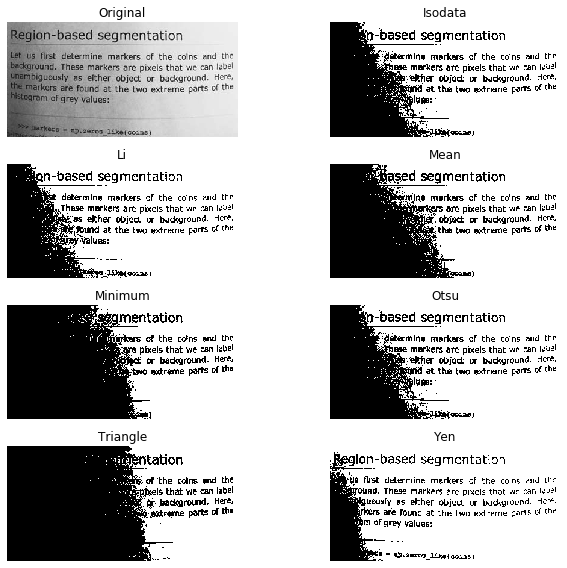

In [5]:
img = data.page()
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

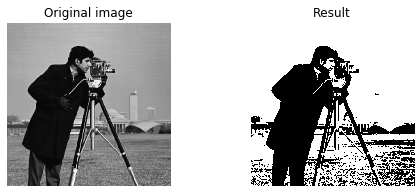

In [10]:
from skimage.filters import threshold_mean


image = data.camera()
thresh = threshold_mean(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')

plt.show()

In [13]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

Text(0.5, 1.0, 'Simple plot')

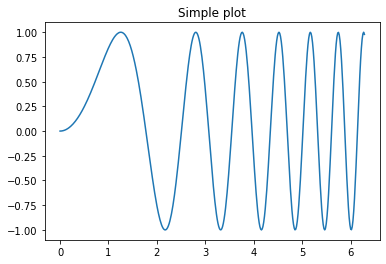

In [14]:
# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')


Text(0.5, 1.0, 'Scater')

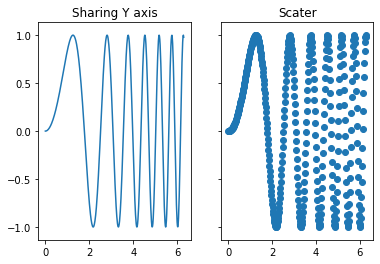

In [16]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
ax2.set_title('Scater')

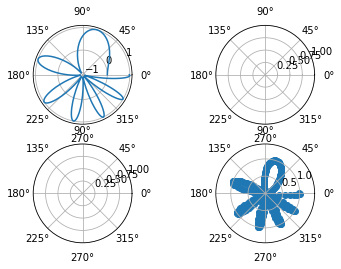

In [17]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82f8a03f10>,
       dtype=object))

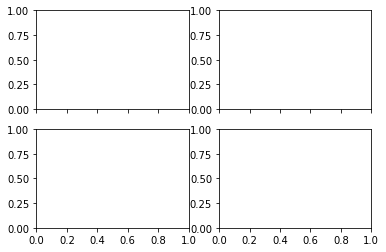

In [18]:
# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82c9693150>,
       dtype=object))

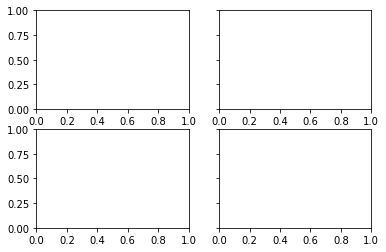

In [19]:
# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82f89b4450>,
       dtype=object))

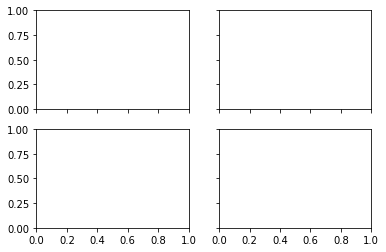

In [20]:
# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82f88f5a90>,
       dtype=object))

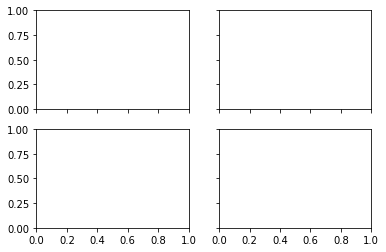

In [21]:
# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

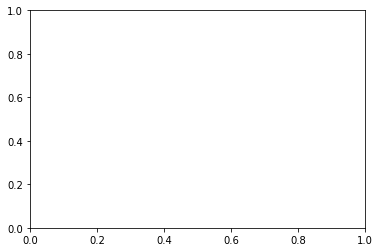

In [22]:
# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)

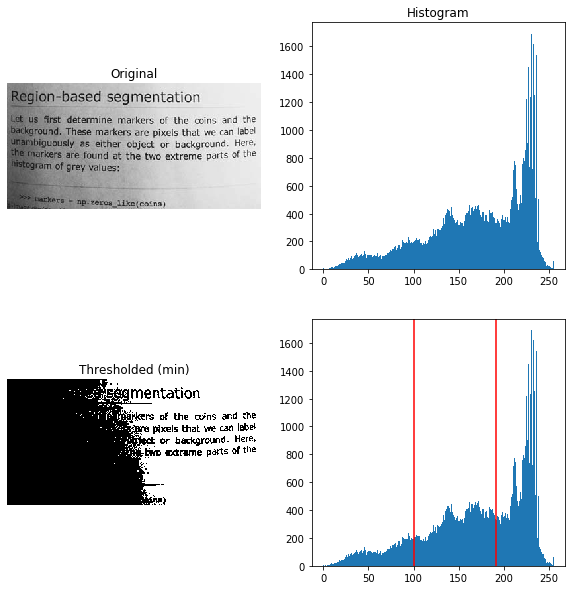

In [25]:
from skimage.filters import threshold_minimum


image = data.page()

thresh_min = threshold_minimum(image)
binary_min = image > thresh_min

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(image.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary_min, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(image.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')
ax[1, 1].axvline(100, color='r')



for a in ax[:, 0]:
    a.axis('off')
plt.show()

/Users/su6i/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


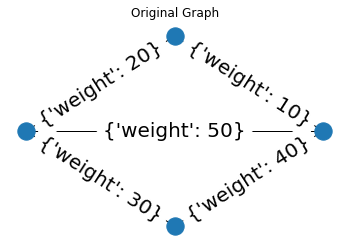

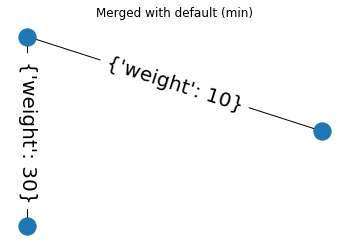

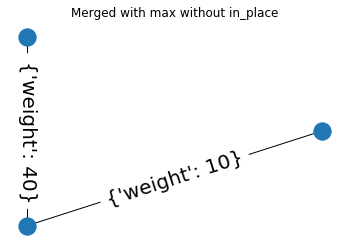

In [26]:
from skimage.future.graph import rag
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np


def max_edge(g, src, dst, n):
    """Callback to handle merging nodes by choosing maximum weight.

    Returns a dictionary with `"weight"` set as either the weight between
    (`src`, `n`) or (`dst`, `n`) in `g` or the maximum of the two when
    both exist.

    Parameters
    ----------
    g : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `g` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dict with the "weight" attribute set the weight between
        (`src`, `n`) or (`dst`, `n`) in `g` or the maximum of the two when
        both exist.
    """

    w1 = g[n].get(src, {'weight': -np.inf})['weight']
    w2 = g[n].get(dst, {'weight': -np.inf})['weight']
    return {'weight': max(w1, w2)}


def display(g, title):
    """Displays a graph with the given title."""
    pos = nx.circular_layout(g)
    plt.figure()
    plt.title(title)
    nx.draw(g, pos)
    nx.draw_networkx_edge_labels(g, pos, font_size=20)


g = rag.RAG()
g.add_edge(1, 2, weight=10)
g.add_edge(2, 3, weight=20)
g.add_edge(3, 4, weight=30)
g.add_edge(4, 1, weight=40)
g.add_edge(1, 3, weight=50)

# Assigning dummy labels.
for n in g.nodes():
    g.nodes[n]['labels'] = [n]

gc = g.copy()

display(g, "Original Graph")

g.merge_nodes(1, 3)
display(g, "Merged with default (min)")

gc.merge_nodes(1, 3, weight_func=max_edge, in_place=False)
display(gc, "Merged with max without in_place")

plt.show()


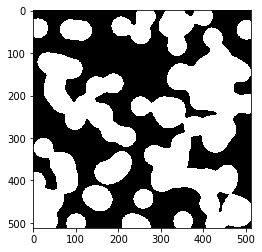

In [5]:
image = data.binary_blobs()
plt.imshow(image, cmap='gray')